<a href="https://colab.research.google.com/github/amit17133129/Covid19-Symptoms-Tracker/blob/master/new_covid_1_done_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel("/home/amitsharma123/Downloads/COVID-19 Clinical Data Repository.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date_published                 922 non-null    datetime64[ns]
 1   clinic_state                   922 non-null    object        
 2   test_name                      922 non-null    object        
 3   swab_type                      922 non-null    object        
 4   covid19_test_results           922 non-null    object        
 5   age                            922 non-null    int64         
 6   high_risk_exposure_occupation  706 non-null    float64       
 7   high_risk_interactions         289 non-null    float64       
 8   diabetes                       922 non-null    bool          
 9   chd                            922 non-null    bool          
 10  htn                            922 non-null    bool          
 11  cancer             

In [ ]:
df = data.copy()


In [ ]:
df['dia'].fillna((df['dia'].mean()), inplace = True)
bins= [60,70,80,90]
labels = ['Low Dia','Normal Dia',
          'High Dia']
dia = pd.cut(df['dia'], bins=bins, labels=labels, right=False)
df["DIA"]=dia
df=df.drop(['dia'],axis=1)
df=pd.concat([df,pd.get_dummies(df['DIA'],drop_first=True)],axis=1)
df = df.drop (['DIA'],axis=1)
df.head(3)
dia_df = pd.DataFrame({
    "Normal Dia":df['Normal Dia'],
    "High Dia":df['High Dia']
    })
#dia_data

In [ ]:
data['cough_severity']

0           NaN
1      Moderate
2          Mild
3           NaN
4           NaN
         ...   
917         NaN
918        Mild
919    Moderate
920    Moderate
921    Moderate
Name: cough_severity, Length: 922, dtype: object

In [ ]:
cough1 = pd.get_dummies(data['sob_severity'], drop_first=True)
cough1

,Moderate,Severe
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
917,0,0
918,0,0
919,0,0
920,1,0


In [ ]:
cough = pd.get_dummies(data['cough_severity'], drop_first=True)
cough_data = pd.DataFrame({"Moderate":cough['Moderate'],"Severe":cough['Severe']})
# cough_data['Moderate'].fillna((cough_data['Moderate'].mean()), inplace = True)
# cough_data['Severe'].fillna((cough_data['Severe'].mean()), inplace = True)
#cough_data #to be concated

In [ ]:
cough

,Moderate,Severe
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
917,0,0
918,0,0
919,1,0
920,1,0


In [ ]:
htn = pd.get_dummies('htn')
df['htn'] = htn
df['htn'].fillna((df['htn'].mean()), inplace = True)

chd= pd.get_dummies('chd')
df['chd'] = chd
df['chd'].fillna((df['chd'].mean()), inplace = True)
chd_htn = df['htn'] + df['chd']
#chd_htn

In [ ]:
bins= [5,10,20,30,40,50,60,70,80,90,100]
labels = ['age1','age2','age3','age4','age5','age6','age7','age8','age9','age10']
Age = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df["Age"]=Age
df=df.drop(['age'],axis=1)
df=pd.concat([df,pd.get_dummies(df['Age'],drop_first=True)],axis=1)
df = df.drop (['Age'],axis=1)
df.head()

age_df = pd.DataFrame({
 #   "Age1":df['age1'],
    "Age2":df['age2'],
    "Age3":df['age3'],
    "Age4":df['age4'],
    "Age5":df['age5'],
    "Age6":df['age6'],
    "Age7":df['age7'],
    "Age8":df['age8'],
    "Age9":df['age9'],
    "Age10":df['age10']

})
#age_data

In [ ]:
bins= [80,100,120,130]
labels = ['lower_sys','Normal_sys','High_sys']
sys = pd.cut(df['sys'], bins=bins, labels=labels, right=False)
df["SYS"]=sys
df=df.drop(['sys'],axis=1)
df=pd.concat([df,pd.get_dummies(df['SYS'],drop_first=True)],axis=1)
df = df.drop (['SYS'],axis=1)
df.head()
sys_data = pd.DataFrame({"High_sys":df['High_sys'],"Normal_sys":df['Normal_sys']})
#sys_data

In [ ]:
bins= [30,40,50,60,70,80,90,100,120,130]
labels = ['sys1','sys2','sys3','sys4','sys5','sys6','sys7','sys8','sys9']
sys = pd.cut(df['sys'], bins=bins, labels=labels, right=False)
df["SYS"]=sys
df=df.drop(['sys'],axis=1)
df=pd.concat([df,pd.get_dummies(df['SYS'],drop_first=True)],axis=1)
df = df.drop (['SYS'],axis=1)
#df.head()


In [ ]:
data['temperature'].fillna((data['temperature'].mean()), inplace = True)
bins= [95,96,98.6,102,110]
labels = ['low_fever', 'normal','fever','high fever']
Temp = pd.cut(data['temperature'], bins=bins, labels=labels, right=False)
data["Temp"]=Temp
df=data.drop(['temperature'],axis=1)
df=pd.concat([df,pd.get_dummies(df['Temp'],drop_first=True)],axis=1)
df = df.drop (['Temp'],axis=1)
df['fever']
fever_data = pd.DataFrame({
                         #"fever":df['fever'],
                        "Normal_fever":df['normal'],
                        "High_fever":df['high fever']})
#fever_data


In [ ]:
df['rr'].fillna((df['rr'].mean()), inplace = True)
bins= [5,10,12,20,21]
labels = ['extreme_low_rr','normal RR','RR','high RR']
Temp = pd.cut(df['rr'], bins=bins, labels=labels, right=False)
df["RR"]=Temp
df=df.drop(['rr'],axis=1)
df=pd.concat([df,pd.get_dummies(df['RR'],drop_first=True)],axis=1)
df = df.drop (['RR'],axis=1)
df
rr_data = pd.DataFrame({
                         #"fever":df['fever'],
                        "Normal_RR":df['normal RR'],
                        "High_RR":df['high RR']})
#rr_data

In [ ]:
#data['stats'].fillna((data['stats'].mean()), inplace = True)
bins= [93,94,95,96,97,98,99,100]
labels = ['SATS_1','SATS_2','SATS_3','SATS_4','SATS_5','SATS_6', 'SATS_7']
Temp = pd.cut(df['sats'], bins=bins, labels=labels, right=False)
df["SATS"]=Temp
df=df.drop(['sats'],axis=1)
df=pd.concat([df,pd.get_dummies(df['SATS'],drop_first=True)],axis=1)
df = df.drop (['SATS'],axis=1)
df
sats_data = pd.DataFrame({
    "sats_1":df['SATS_2'],
    "sats2":df['SATS_3'],
    "sats4":df['SATS_4'],
   "sats5":df['SATS_5'],
    "sats6":df['SATS_6'],
   "sats7":df['SATS_7'],


})
#sats_data

In [ ]:
data['pulse'].fillna((data['pulse'].mean()), inplace = True)
bins= [0,60,100,200]
labels = ['low pulse','normal_pulse','high pulse']
pulse = pd.cut(df['pulse'], bins=bins, labels=labels, right=False)
df["Pulse"]=pulse
df=df.drop(['pulse'],axis=1)
df=pd.concat([df,pd.get_dummies(df['Pulse'],drop_first=True)],axis=1)
df = df.drop (['Pulse'],axis=1)
df.head(3)
pulse_data = pd.DataFrame({
   # "normal_pulse1":df['normal_pulse1'],
    "normal_pulse":df['normal_pulse'],
   "high_pulse":df['high pulse']

})
#pulse_data

KeyError: 'pulse'

In [ ]:

df['high_risk_exposure_occupation'].fillna((df['high_risk_exposure_occupation'].mean()), inplace = True)
df['high_risk_interactions'].fillna((df['high_risk_interactions'].mean()), inplace = True)
df['pulse'].fillna((df['pulse'].mean()), inplace = True)
df['sys'].fillna((df['sys'].mean()), inplace = True)
df['dia'].fillna((df['dia'].mean()), inplace = True)
df['rr'].fillna((df['rr'].mean()), inplace = True)
df['sats'].fillna((df['sats'].mean()), inplace = True)
df['days_since_symptom_onset'].fillna((df['days_since_symptom_onset'].mean()), inplace = True)
df['ctab'].fillna((data['ctab'].mean()), inplace = True)
df['labored_respiration'].fillna((df['labored_respiration'].mean()), inplace = True)
df['rhonchi'].fillna((df['rhonchi'].mean()), inplace = True)
df['wheezes'].fillna((df['wheezes'].mean()), inplace = True)
df['cough'].fillna((df['cough'].mean()), inplace = True)
#------------------------------------------------------------------
# htn = pd.get_dummies('htn')
# data['htn'] = htn
df['htn'].fillna((df['htn'].mean()), inplace = True)

# chd= pd.get_dummies('chd')
# data['chd'] = chd
df['chd'].fillna((df['chd'].mean()), inplace = True)

# cough = pd.get_dummies('cough_severity')
# data['cough_severity'] = cough
#data['cough_severity'].fillna((data['cough_severity'].mean()), inplace = True)

#-------------------------------------------------------------------
# data['fever'].fillna((data['fever'].mean()), inplace = True)
df['sob'].fillna((df['sob'].mean()), inplace = True)
#---------------------------------------------------------------


# data['sob_severity'].fillna((data['sob_severity'].mean()), inplace = True)

df['diarrhea'].fillna((df['diarrhea'].mean()), inplace = True)
df['fatigue'].fillna((df['fatigue'].mean()), inplace = True)
df['headache'].fillna((df['headache'].mean()), inplace = True)
df['loss_of_smell'].fillna((df['loss_of_smell'].mean()), inplace = True)
df['loss_of_taste'].fillna((df['loss_of_taste'].mean()), inplace = True)
df['runny_nose'].fillna((df['runny_nose'].mean()), inplace = True)
df['muscle_sore'].fillna((df['muscle_sore'].mean()), inplace = True)
df['sore_throat'].fillna((df['sore_throat'].mean()), inplace = True)


In [ ]:
high_risk_interactions = pd.get_dummies(df['high_risk_interactions'], drop_first=True)
high_risk_interactions

,1.0
0,0
1,0
2,0
3,0
4,0
...,...
917,0
918,0
919,0
920,0


In [ ]:
high_risk_exposure_occupation = pd.get_dummies(df['high_risk_exposure_occupation'], drop_first=True)
high_risk_interactions = pd.get_dummies(df['high_risk_interactions'], drop_first=True)
cxr_link = pd.get_dummies('cxr_link')
cxr_impression = pd.get_dummies(df['cxr_impression'])
cxr_finding = pd.get_dummies(df['cxr_findings'])
ctab = pd.get_dummies(df['ctab'], drop_first=True)
laboured_respiration = pd.get_dummies(df['labored_respiration'], drop_first=True)
ronchi = pd.get_dummies(df['rhonchi'], drop_first=True)
weezes = pd.get_dummies(df['wheezes'], drop_first=True)
fatigue = pd.get_dummies(df['fatigue'], drop_first=True)
headache = pd.get_dummies(df['headache'], drop_first=True)
runny_nose = pd.get_dummies(df['runny_nose'], drop_first=True)
muscle_sore = pd.get_dummies(df['muscle_sore'], drop_first=True)
diariah = pd.get_dummies(df['diarrhea'], drop_first=True)
sore_throat = pd.get_dummies(df['sore_throat'], drop_first=True)
sob = pd.get_dummies(df['sob'], drop_first=True)
clinic_state = pd.get_dummies(df['clinic_state'])
dia = pd.get_dummies(df['dia'])
sar_co2 = pd.get_dummies(df['test_name'], drop_first = True)
a1 = sar_co2['SARS COV 2 RNA RTPCR'] + sar_co2['SARS CoV w/CoV 2 RNA'] +sar_co2['SARS-CoV-2, NAA']
diabetes = pd.get_dummies(df['diabetes'], drop_first = True)
chd = pd.get_dummies(df['chd'], drop_first = True)
cancer =pd.get_dummies(df['cancer'], drop_first = True)
asthma = pd.get_dummies(df['asthma'], drop_first = True)
copd = pd.get_dummies(df['copd'], drop_first = True)
autoimmune_dis = pd.get_dummies(df['autoimmune_dis'], drop_first = True)
loss_taste = pd.get_dummies(df['loss_of_taste'], drop_first=True)
loss_smell = pd.get_dummies(df['loss_of_smell'], drop_first=True)

new_data = pd.concat([clinic_state,a1,diabetes,chd,cancer,
                  asthma,copd,autoimmune_dis,diariah,
                 sob,sore_throat,muscle_sore,runny_nose,
                 loss_taste, loss_smell, headache,fatigue,

                       weezes,
                 ronchi, laboured_respiration,
                     ctab,
                      high_risk_interactions, high_risk_exposure_occupation],
                      axis =1)

#new_data

In [ ]:
new_data.columns = ['clinic_state','Sars_co2','diabetes','chd','cancer',
                 'asthma','copd','autoimmune_dis','diariah_0.227273',
               'diariah_1.000000', 'sob', 'sore_throat_0.820896',
               'sore_throat_0.1', 'muscle_sore_0.68','muscle_sore_1.0',
              'runny_nose_0.5', 'runny_nose_1.0', 'loss_taste_0.26',
               'loss_taste_1.0', 'loss_smell_0.30', 'loss_smell_1.0',
              'headache_0.80', 'headache_1.0', 'fatigue_0.85','fatigue_1.0'
               , 'weezes_0.0525', 'weezes_1.0',
                    'ronchi_0.026616',
               'ronchi_1.0', 'laboured_respiration_0.006818', 'laboured_respiration_1.0',
               'ctab_0.924', 'ctab_1.0',
               'high_risk_interactions_0.550173',
                'high_risk_interactions_1.0', 'high_risk_exposure_occupation_0.437677',
                'high_risk_exposure_occupation_1.0'
                   ]
new_data

ValueError: Length mismatch: Expected axis has 23 elements, new values have 37 elements

In [ ]:
import numpy as np
x = pd.concat([pulse_data, sats_data, rr_data, fever_data,
               chd_htn, cough_data, dia_data, new_data], axis = 1 )
X = np.array(x)
x.head(5)

,normal_pulse1,normal_pulse2,normal_pulse3,normal_pulse4,normal_pulse5,high_pulse,sats_1,sats2,sats4,sats5,...,ronchi_0.026616,ronchi_1.0,laboured_respiration_0.006818,laboured_respiration_1.0,ctab_0.924,ctab_1.0,high_risk_interactions_0.550173,high_risk_interactions_1.0,high_risk_exposure_occupation_0.437677,high_risk_exposure_occupation_1.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
x.shape

(922, 58)

In [ ]:
pd.DataFrame({'X_features':x.columns})

,X_features
0,normal_pulse1
1,normal_pulse2
2,normal_pulse3
3,normal_pulse4
4,normal_pulse5
5,high_pulse
6,sats_1
7,sats2
8,sats4
9,sats5


In [ ]:
covid_19 = pd.get_dummies(data['covid19_test_results'])
y = covid_19
y = y[['Negative', 'Positive']]
y = y['Negative'] + y['Positive']
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=40 ) 

In [ ]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense
from keras.optimizers import Adam
model.add(Dense(units =10, input_shape = (58,)))
model.add(Dense(units =12, activation = 'relu'))
model.add(Dense(units =15, activation = 'relu'))
model.add(Dense(units =1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

Using TensorFlow backend.


In [ ]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
645/645 [==============================] - 0s 770us/step - loss: 0.6274 - accuracy: 0.6295
Epoch 2/50
645/645 [==============================] - 0s 110us/step - loss: 0.2697 - accuracy: 0.9984
Epoch 3/50
645/645 [==============================] - 0s 103us/step - loss: 0.1081 - accuracy: 0.9984
Epoch 4/50
645/645 [==============================] - 0s 91us/step - loss: 0.0424 - accuracy: 0.9984
Epoch 5/50
645/645 [==============================] - 0s 103us/step - loss: 0.0225 - accuracy: 0.9984
Epoch 6/50
645/645 [==============================] - 0s 98us/step - loss: 0.0167 - accuracy: 0.9984
Epoch 7/50
645/645 [==============================] - 0s 102us/step - loss: 0.0146 - accuracy: 0.9984
Epoch 8/50
645/645 [==============================] - 0s 150us/step - loss: 0.0133 - accuracy: 0.9984
Epoch 9/50
645/645 [==============================] - 0s 162us/step - loss: 0.0128 - accuracy: 0.9984
Epoch 10/50
645/645 [==============================] - 0s 149us/step - loss: 0.0124 

In [ ]:
loss =pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy
0,0.627409,0.629457
1,0.269672,0.998450
2,0.108082,0.998450
3,0.042358,0.998450
4,0.022491,0.998450


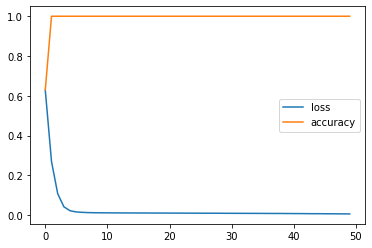

In [ ]:
loss.plot()

In [ ]:
y_test.shape

(277,)

In [ ]:
X = [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.]]
X = np.array(X)
X.shape

(40, 40)

In [ ]:
X = [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.],[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.,1.]]
y = np.array(X)     #converted y which have 35 feature into array (35,35)
                    # so that model will predict 
y.shape

(40, 58)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print("THIS IS JUST AN EXAMPLE :",model.predict(y))

THIS IS JUST AN EXAMPLE : [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
print("Prediction on X_test data :",model.predict(X_test))

Prediction on X_test data : [[0.99618214]
 [0.9998708 ]
 [0.99951506]
 [0.99903345]
 [0.9995321 ]
 [0.99954057]
 [0.99919885]
 [0.99934083]
 [0.9999491 ]
 [0.9987206 ]
 [0.9997522 ]
 [0.9999856 ]
 [0.99996686]
 [0.9987789 ]
 [0.99901235]
 [0.9987218 ]
 [0.9980387 ]
 [0.99818736]
 [0.99986243]
 [0.99933726]
 [0.99973744]
 [0.99952483]
 [0.99915636]
 [0.9999355 ]
 [0.9992446 ]
 [0.99797326]
 [0.9996183 ]
 [0.99881446]
 [0.9989992 ]
 [0.9860811 ]
 [0.99671245]
 [0.99882966]
 [0.9943743 ]
 [0.998071  ]
 [0.998042  ]
 [0.99974996]
 [0.99763596]
 [0.99988115]
 [0.99846494]
 [0.9996182 ]
 [0.9997986 ]
 [0.99797684]
 [0.99966276]
 [0.99993193]
 [0.9993106 ]
 [0.99757653]
 [0.9998777 ]
 [0.9988673 ]
 [0.99992263]
 [0.99996054]
 [0.99851674]
 [0.9990546 ]
 [0.9999268 ]
 [0.9995869 ]
 [0.99996555]
 [0.9997179 ]
 [0.9999486 ]
 [0.9992217 ]
 [0.99995875]
 [0.99959594]
 [0.9997391 ]
 [0.9999362 ]
 [0.9995322 ]
 [0.99730766]
 [0.9962166 ]
 [0.9991767 ]
 [0.99921477]
 [0.9976878 ]
 [0.98333424]
 [0.99